In [1]:
import pandas as pd

old_offers = pd.read_csv('/Users/jessiehsieh/Documents/Programming/Data_Science/WebScraping/WGGesucht/backup/wggesucht_angebote_full_31may.csv')

In [2]:
old_offers['offer_id'] = old_offers['link'].str[-12:-5]
old_marker = old_offers[['offer_id','request_sent']]
old_offers.drop(['headline', 'text_WGleben', 'request_sent','link','SCHUFA', 'umzugsfirma'], axis=1, inplace=True)
old_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 25 columns):
eintrag            601 non-null object
miete              601 non-null object
groesse            601 non-null object
stadtteil          601 non-null object
freiab             601 non-null object
freibis            601 non-null object
bewohner_M         601 non-null int64
bewohner_W         601 non-null int64
freiraum_egal      601 non-null int64
freiraum_M         601 non-null int64
freiraum_W         601 non-null int64
nebenKosten        601 non-null object
sonstigeKosten     601 non-null object
kaution            601 non-null object
abstandszahlung    601 non-null object
address_part1      601 non-null object
address_part2      601 non-null object
wohnungsgroesse    601 non-null object
rauchen            601 non-null object
gesucht            601 non-null object
text_zimmer        588 non-null object
text_lage          423 non-null object
text_sonstige      326 non-null object
Mit

In [3]:
new_offers = pd.read_csv('/Users/jessiehsieh/Documents/Programming/Data_Science/WebScraping/WGGesucht/backup/wggesucht_angebote_full_26jun.csv')

new_offers['offer_id'] = new_offers['link'].str[-12:-5]
new_offers.drop(['headline', 'text_WGleben', 'link_shorten','link','SCHUFA', 'umzugsfirma'], axis=1, inplace=True)

new_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 25 columns):
eintrag            544 non-null object
miete              544 non-null object
groesse            544 non-null object
stadtteil          544 non-null object
freiab             544 non-null object
freibis            544 non-null object
bewohner_M         544 non-null int64
bewohner_W         544 non-null int64
freiraum_egal      544 non-null int64
freiraum_M         544 non-null int64
freiraum_W         544 non-null int64
nebenKosten        544 non-null object
sonstigeKosten     544 non-null object
kaution            544 non-null object
abstandszahlung    544 non-null object
address_part1      544 non-null object
address_part2      544 non-null object
wohnungsgroesse    544 non-null object
rauchen            544 non-null object
gesucht            544 non-null object
text_zimmer        543 non-null object
text_lage          425 non-null object
text_sonstige      346 non-null object
Mit

In [4]:
all_offers = pd.concat([old_offers, new_offers], axis=0)
all_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1145 entries, 0 to 543
Data columns (total 25 columns):
eintrag            1145 non-null object
miete              1145 non-null object
groesse            1145 non-null object
stadtteil          1145 non-null object
freiab             1145 non-null object
freibis            1145 non-null object
bewohner_M         1145 non-null int64
bewohner_W         1145 non-null int64
freiraum_egal      1145 non-null int64
freiraum_M         1145 non-null int64
freiraum_W         1145 non-null int64
nebenKosten        1145 non-null object
sonstigeKosten     1145 non-null object
kaution            1145 non-null object
abstandszahlung    1145 non-null object
address_part1      1145 non-null object
address_part2      1145 non-null object
wohnungsgroesse    1145 non-null object
rauchen            1145 non-null object
gesucht            1145 non-null object
text_zimmer        1131 non-null object
text_lage          848 non-null object
text_sonstige      6

In [5]:
new_marker = pd.read_csv('/Users/jessiehsieh/Documents/Programming/Data_Science/WebScraping/WGGesucht/backup/offer_tracking.csv')

In [6]:
new_marker.columns = ['offer_id', 'request_sent', 'deleted','deactivated', 'scam','suspected']
new_marker = new_marker[['offer_id','deleted','scam']]

new_marker['offer_id'] = new_marker['offer_id'].astype(str)
new_marker.drop_duplicates('offer_id',inplace=True)
new_marker.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 123
Data columns (total 3 columns):
offer_id    122 non-null object
deleted     5 non-null float64
scam        10 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.8+ KB


In [7]:
all_offers = all_offers.merge(new_marker, on='offer_id',how='left')

In [8]:
all_offers[['deleted','scam']] = all_offers[['deleted','scam']].fillna(0)
#all_offers = all_offers.dropna()
all_offers[['text_lage','text_sonstige']] = all_offers[['text_lage','text_sonstige']].fillna('x')
all_offers = all_offers.dropna()
all_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130 entries, 0 to 1144
Data columns (total 27 columns):
eintrag            1130 non-null object
miete              1130 non-null object
groesse            1130 non-null object
stadtteil          1130 non-null object
freiab             1130 non-null object
freibis            1130 non-null object
bewohner_M         1130 non-null int64
bewohner_W         1130 non-null int64
freiraum_egal      1130 non-null int64
freiraum_M         1130 non-null int64
freiraum_W         1130 non-null int64
nebenKosten        1130 non-null object
sonstigeKosten     1130 non-null object
kaution            1130 non-null object
abstandszahlung    1130 non-null object
address_part1      1130 non-null object
address_part2      1130 non-null object
wohnungsgroesse    1130 non-null object
rauchen            1130 non-null object
gesucht            1130 non-null object
text_zimmer        1130 non-null object
text_lage          1130 non-null object
text_sonstige     

In [10]:
all_offers['scam'][all_offers['deleted']==1]=1
all_offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130 entries, 0 to 1144
Data columns (total 27 columns):
eintrag            1130 non-null object
miete              1130 non-null object
groesse            1130 non-null object
stadtteil          1130 non-null object
freiab             1130 non-null object
freibis            1130 non-null object
bewohner_M         1130 non-null int64
bewohner_W         1130 non-null int64
freiraum_egal      1130 non-null int64
freiraum_M         1130 non-null int64
freiraum_W         1130 non-null int64
nebenKosten        1130 non-null object
sonstigeKosten     1130 non-null object
kaution            1130 non-null object
abstandszahlung    1130 non-null object
address_part1      1130 non-null object
address_part2      1130 non-null object
wohnungsgroesse    1130 non-null object
rauchen            1130 non-null object
gesucht            1130 non-null object
text_zimmer        1130 non-null object
text_lage          1130 non-null object
text_sonstige     

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,0,'Monthly Rent in Euros')

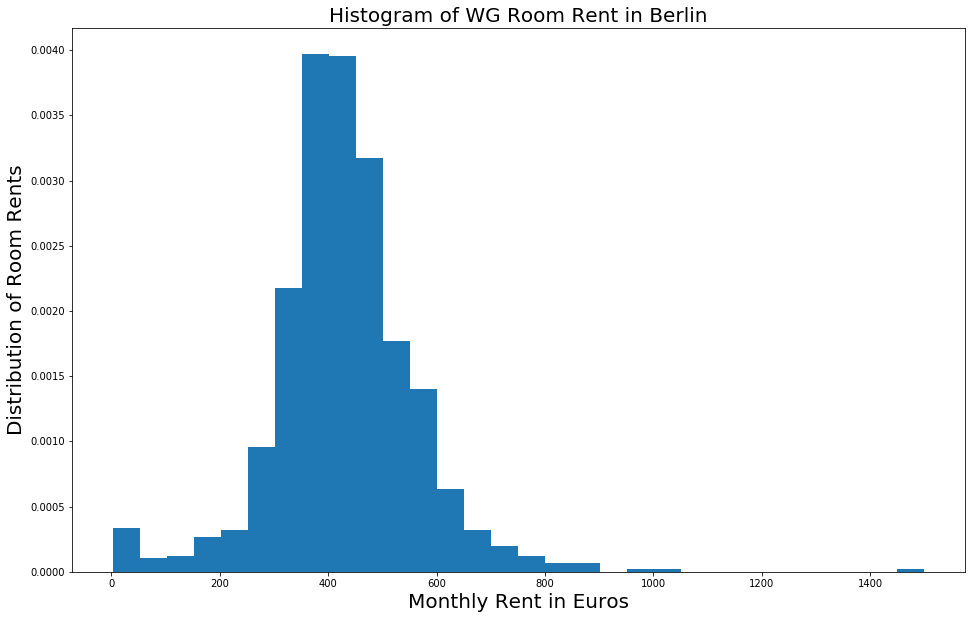

In [11]:
all_offers.miete = all_offers.miete.str.replace('euros','').astype(int)

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig, ax = plt.subplots(figsize = (16,10))
plt.hist(all_offers.miete, normed=True, bins=30)
ax.set_title('Histogram of WG Room Rent in Berlin', size=20)
ax.set_ylabel('Distribution of Room Rents', size=20)
ax.set_xlabel('Monthly Rent in Euros', size = 20)

In [12]:
# cleaning the amount of deposit and other costs
all_offers['nebenKosten'] = all_offers['nebenKosten'].str.replace('euros','').replace('n.a.','0').astype(int)
all_offers['kaution'] = all_offers['kaution'].str.replace('euros','').replace('none','0').astype(int)
all_offers['sonstigeKosten'] = all_offers['sonstigeKosten'].str.replace('euros','').replace('none','0').astype(int)
all_offers['abstandszahlung'] = all_offers['abstandszahlung'].str.replace('euros','').replace('none','0').astype(int)

Text(0.5,0,'Kaution in Euros')

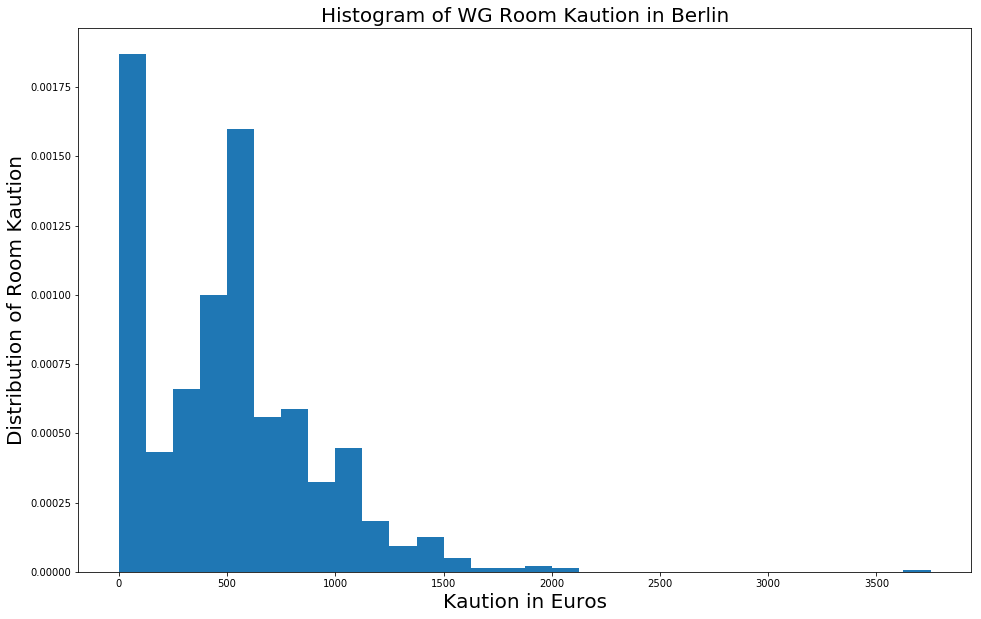

In [16]:
fig, ax = plt.subplots(figsize = (16,10))
plt.hist(all_offers.kaution, normed=True, bins=30)
ax.set_title('Histogram of WG Room Kaution in Berlin', size=20)
ax.set_ylabel('Distribution of Room Kaution', size=20)
ax.set_xlabel('Kaution in Euros', size = 20)

In [14]:
# cleaning room and flat sizes
all_offers['groesse'] = all_offers['groesse'].str.replace('squaremeter','').replace('none','0').astype(int)
all_offers['wohnungsgroesse'] = all_offers['wohnungsgroesse'].str.replace('squaremeter','').replace('none','0').astype(int)

Text(0.5,0,'Room Size in Square Meter')

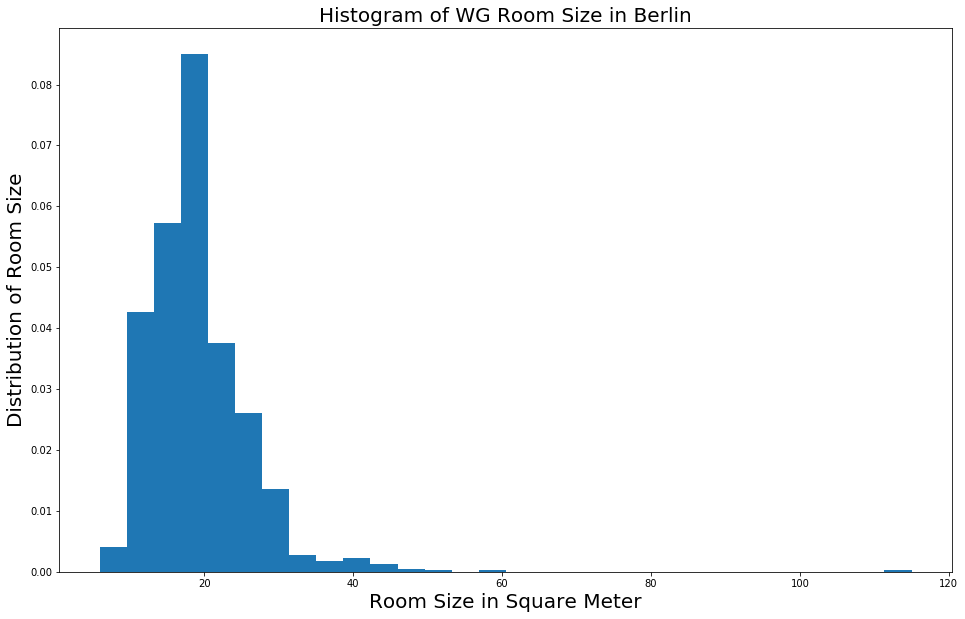

In [17]:
fig, ax = plt.subplots(figsize = (16,10))
plt.hist(all_offers.groesse, normed=True, bins=30)
ax.set_title('Histogram of WG Room Size in Berlin', size=20)
ax.set_ylabel('Distribution of Room Size', size=20)
ax.set_xlabel('Room Size in Square Meter', size = 20)

In [19]:
def clean_text(text):
    text = text.lower().replace('\n', '')
    text = text.replace('€' , 'euros').replace('m²' , 'squaremeter')
    text = text.replace('ä' , 'ae').replace('Ä' , 'Ae')
    text = text.replace('ö' , 'oe').replace('Ö' , 'Oe')
    text = text.replace('ü' , 'ue').replace('Ü' , 'Ue').replace('ß', 'ss')
    return text

all_offers['text_zimmer'] = all_offers['text_zimmer'].apply(clean_text)
all_offers['text_lage'] = all_offers['text_lage'].apply(clean_text)
all_offers['text_sonstige'] = all_offers['text_sonstige'].apply(clean_text)
all_offers['stadtteil'] = all_offers['stadtteil'].apply(clean_text)

all_offers['full_text'] = all_offers['text_zimmer'].astype(str) + all_offers['text_lage'].astype(str) + all_offers['text_sonstige'].astype(str)

In [20]:
all_offers.groupby('scam').mean()[['miete','kaution','groesse']]

,miete,kaution,groesse
scam,,,
0.0,440.579088,494.788204,19.157283
1.0,380.454545,166.818182,22.636364


In [61]:
all_offers.head(10)

,eintrag,miete,groesse,stadtteil,freiab,freibis,bewohner_M,bewohner_W,freiraum_egal,freiraum_M,...,MitgliedSeit,offer_id,deleted,scam,full_text,polarity,subjectivity,polarity_de,subjectivy_de,subjectivity_de
0,21.05.2018,440,10,wedding,01.06.2018,31.12.2018,1,1,4,0,...,none,5526511,0.0,0.0,"!! bitte nur bewerben, wenn du mindestens 7 mo...",0.000000,0.000000,0.229167,0,0.069444
1,21.05.2018,150,12,berlin,30.06.2018,13.07.2018,7,2,0,0,...,none,6698867,0.0,0.0,"hallo, ich mache urlaub und vermiete mein zimm...",-0.875000,0.666667,0.193750,0,0.000000
2,21.05.2018,420,19,berlintreptow-koepenick,01.06.2018,empty,1,0,1,0,...,none,6698866,0.0,0.0,cosy room designed for students with wide stud...,0.155261,0.448611,0.700000,0,0.000000
3,21.05.2018,420,22,neukoelln,01.06.2018,01.06.2019,0,1,1,0,...,none,5947888,0.0,0.0,das zu vermiete zimmer geht direkt vom flur ei...,-0.350000,0.333333,0.292308,0,0.076923
4,21.05.2018,500,16,kreuzberg,01.06.2018,30.11.2018,0,0,3,0,...,none,6691063,0.0,0.0,"das zimmer ist ca. 16qm gross, teilmoebliert m...",0.238145,0.468700,0.038889,0,0.055556
5,21.05.2018,500,13,adlershof,31.05.2018,empty,1,0,1,0,...,none,6687367,0.0,0.0,das zimmer hat eine groesse von ca.13squaremet...,0.500000,1.000000,0.188889,0,0.111111
6,21.05.2018,350,15,berlin,01.06.2018,01.07.2018,1,2,1,0,...,none,6698847,0.0,0.0,"hallo leute,in einer sehr geraeumigen, gut aus...",0.274773,0.462500,0.353125,0,0.000000
7,21.05.2018,600,19,prenzlauerberg,22.05.2018,01.12.2019,1,1,1,0,...,none,1513311,0.0,0.0,german version below--------------------------...,0.142172,0.486014,0.191358,0,0.012346
8,21.05.2018,400,20,wedding,24.05.2018,20.06.2018,0,1,1,0,...,none,6698840,0.0,0.0,"hallo zusammen,ich vermiete mein schoenes hell...",0.200000,0.300000,0.170370,0,0.055556
9,21.05.2018,500,22,charlottenburg,01.06.2018,01.10.2018,0,1,1,0,...,none,2704830,0.0,0.0,"sanierter altbau, 1. etage, moebliert - wg-tau...",-0.700000,0.666667,0.333333,0,0.000000


In [25]:
import csv
english_stopwords = []
with open('stop_word_list.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        for cell in row:
            english_stopwords.append(cell.replace(' ',''))
english_stopwords.append('for')
english_stopwords

['a',
 'able',
 'about',
 'across',
 'after',
 'all',
 'almost',
 'also',
 'am',
 'among',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'but',
 'by',
 'can',
 'cannot',
 'could',
 'dear',
 'did',
 'do',
 'does',
 'either',
 'else',
 'ever',
 'every',
 'for',
 'from',
 'get',
 'got',
 'had',
 'has',
 'have',
 'he',
 'her',
 'hers',
 'him',
 'his',
 'how',
 'however',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'just',
 'least',
 'let',
 'like',
 'likely',
 'may',
 'me',
 'might',
 'most',
 'must',
 'my',
 'neither',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'often',
 'on',
 'only',
 'or',
 'other',
 'our',
 'own',
 'rather',
 'said',
 'say',
 'says',
 'she',
 'should',
 'since',
 'so',
 'some',
 'than',
 'that',
 'the',
 'their',
 'them',
 'then',
 'there',
 'these',
 'they',
 'this',
 'tis',
 'to',
 'too',
 'twas',
 'us',
 'wants',
 'was',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'would

In [26]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
import imageio

def white_color_func(word, font_size, position, orientation, random_state=None,
 **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

d = '/Users/jessiehsieh/Documents/Programming/Data_Science/WebScraping/WGGesucht/'
path = path.join(d, "flyhouse.png")
mask_flyhouse=imageio.imread(path)

mask_flyhouse

Image([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ..., 
       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

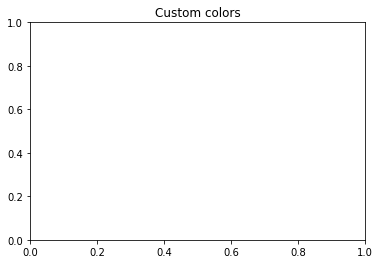

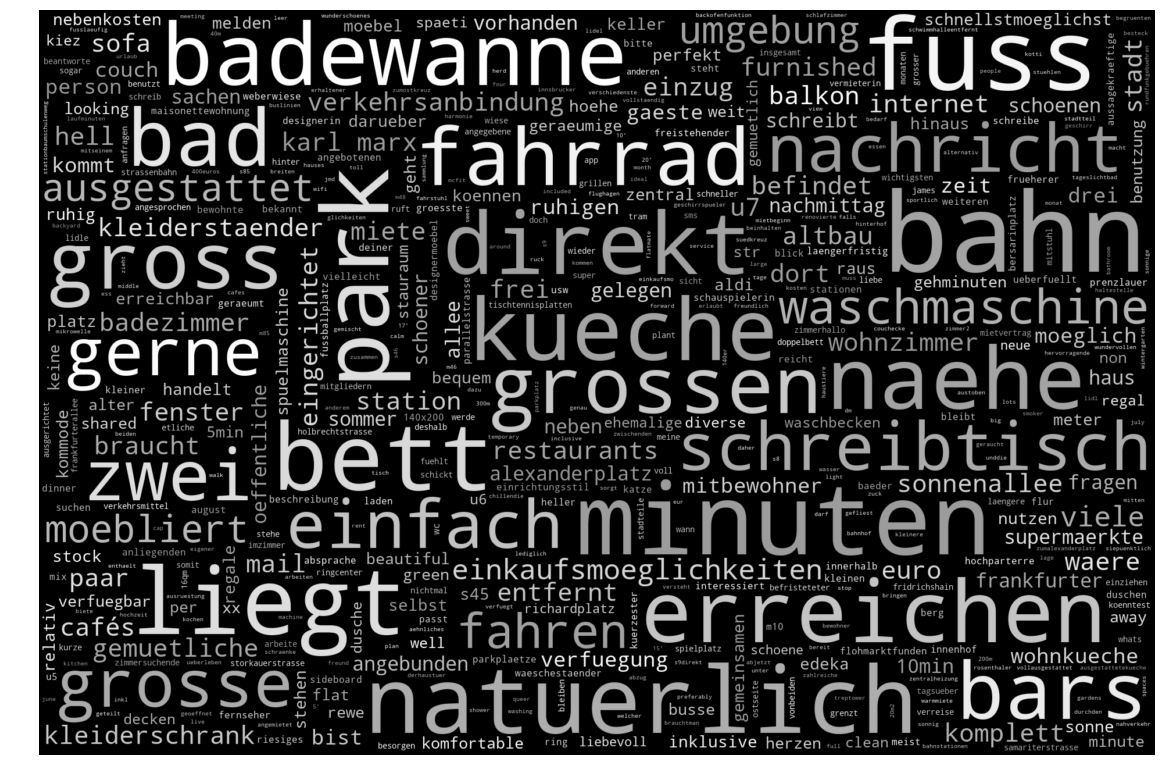

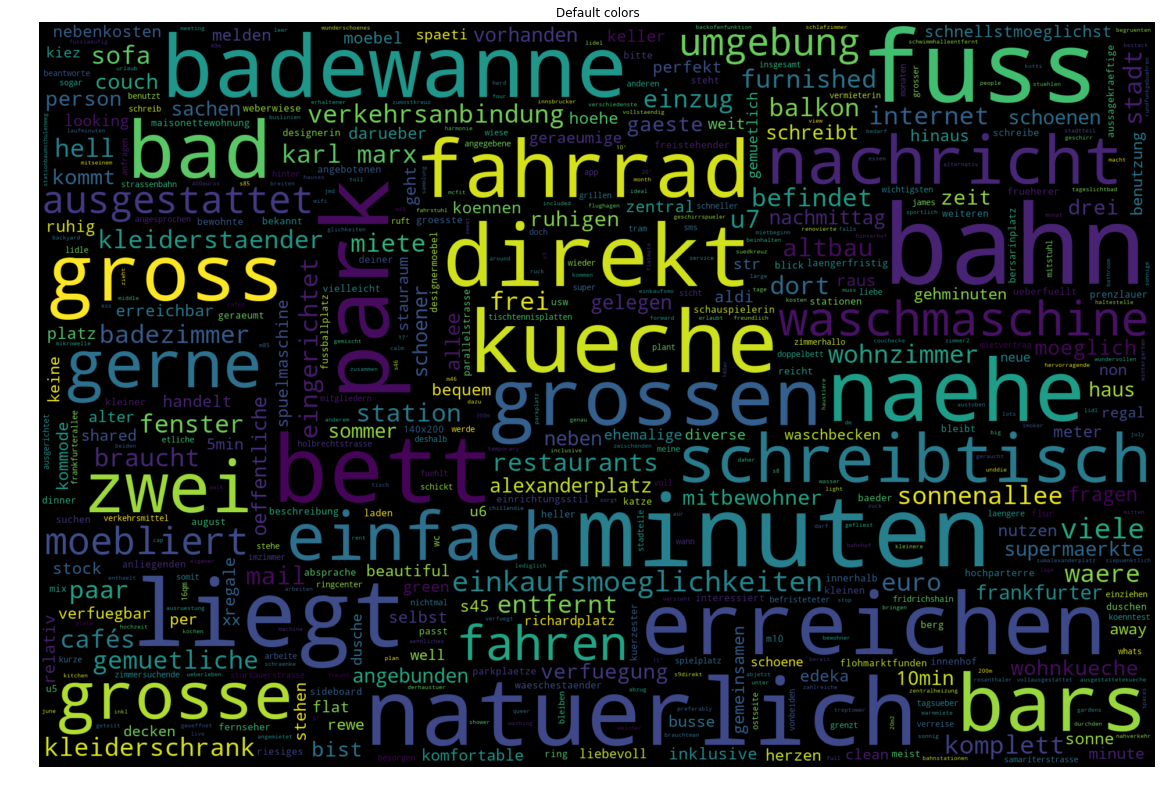

In [52]:
# wordcloud for Scammers

text = ' '.join(all_offers[all_offers['scam']==1]['full_text'])
stopwords = set( ['ich',"and", "the", "of", "to", "einer", 'gibt',
      "eine", "eines", "einem", "einen", "der", "die", "das", 'gut',
      "dass", "daß", "du", "er", "sie", "es", "was", "wer", 'wenn',
      "wie", "wir", "und", "oder", "ohne", "mit", "am", "im", 'wo',
      "in", "aus", "auf", "ist", "sein", "war", "wird", "ihr", 'dann',
      "ihre", "ihres", "ihnen", "ihrer", "als", "fuer", "von",
      "mit", "dich", "dir", "mich", "mir", "mein", "sein",'bin',
      "kein", "durch", "wegen", "wird", "sich", "bei", "beim",
      "noch", "den", "dem", "zu", "zur", "zum", "auf", "ein",
      "auch", "werden", "an", "des", "sein", "sind", "vor",'habe',
      "nicht", "sehr", "um", "unsere", "ohne", "so", "da", "nur",
      "diese", "dieser", "diesem", "dieses", "nach", "ueber",
      "mehr", "hat", "bis", "uns", "unser", "unserer", "unserem",
      "unsers", "euch", "euers", "euer", "eurem", "ihr", "ihres",
      "ihrer", "ihrem", "alle", "vom",'also','kann', 'ab', 'allem','alles',
        'mal','min','hier','sowie','wg','aber','etc','man','ca',
        'ausserdem','haben', 'etwa', 'hast', 'etwas']+ english_stopwords)

specific_stopwords = ["fick",'room','zimmer', 'sqm', 'qm', 'wohnung'] + list(all_offers['stadtteil'])
for word in specific_stopwords:
    stopwords.add(word)

wc = WordCloud(max_words=500, mask=mask_flyhouse, stopwords=stopwords,
margin=10,
random_state=1).generate(text)
default_colors = wc.to_array()
plt.title("Custom colors")
fig, ax = plt.subplots(figsize = (20,20))
plt.imshow(wc.recolor(color_func=white_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.figure(figsize = (20,20))
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

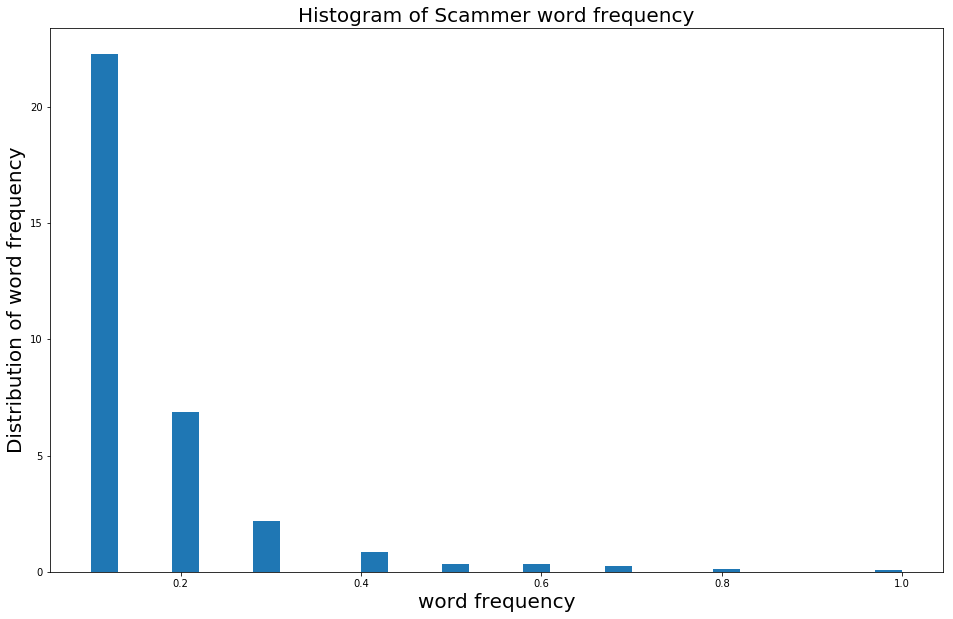

In [53]:
freq_word_scam = pd.DataFrame(pd.DataFrame(wc.words_, index=range(0,len(wc.words_))).iloc[0])
freq_word_scam = freq_word_scam.reset_index()
freq_word_scam.columns = ['word','frequency']

x = freq_word_scam['frequency']
fig, ax = plt.subplots(figsize = (16,10))
plt.hist(x, normed=True, bins=30)
ax.set_title('Histogram of Scammer word frequency', size=20)
ax.set_ylabel('Distribution of word frequency', size=20)
ax.set_xlabel('word frequency', size = 20)

freq_word_scam = freq_word_scam[freq_word_scam['frequency']>0.3]

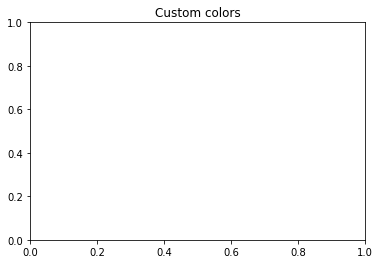

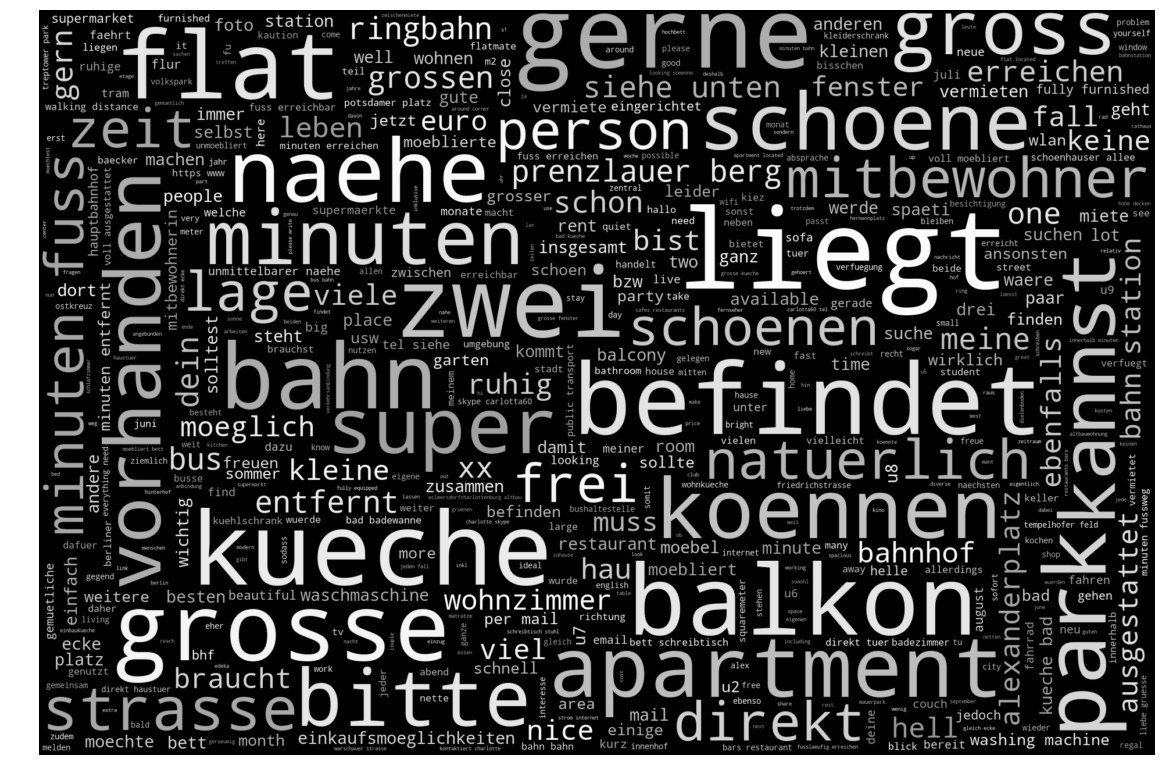

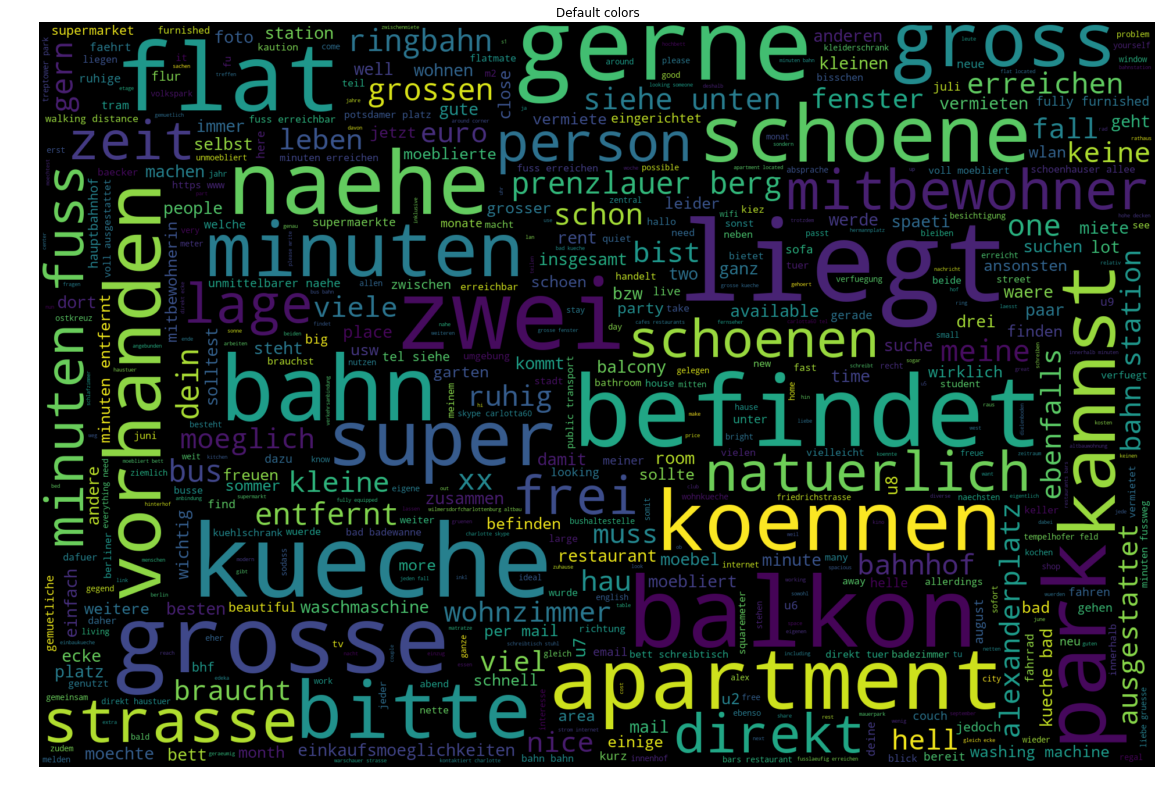

In [56]:
# wordcloud for legitimate users
text = ' '.join(all_offers[all_offers['scam']==0]['full_text'])

wc = WordCloud(max_words=500, mask=mask_flyhouse, stopwords=stopwords,
margin=10,
random_state=1).generate(text)
default_colors = wc.to_array()
plt.title("Custom colors")
fig, ax = plt.subplots(figsize = (20,20))
plt.imshow(wc.recolor(color_func=white_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.figure(figsize = (20,20))
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

In [65]:
all_offers[all_offers['scam']==1]['full_text'].apply(lambda x: 1 if 'bitte' in x else 0)

41      1
56      0
64      0
75      0
190     0
278     0
786     0
788     0
879     0
886     0
1029    0
Name: full_text, dtype: int64

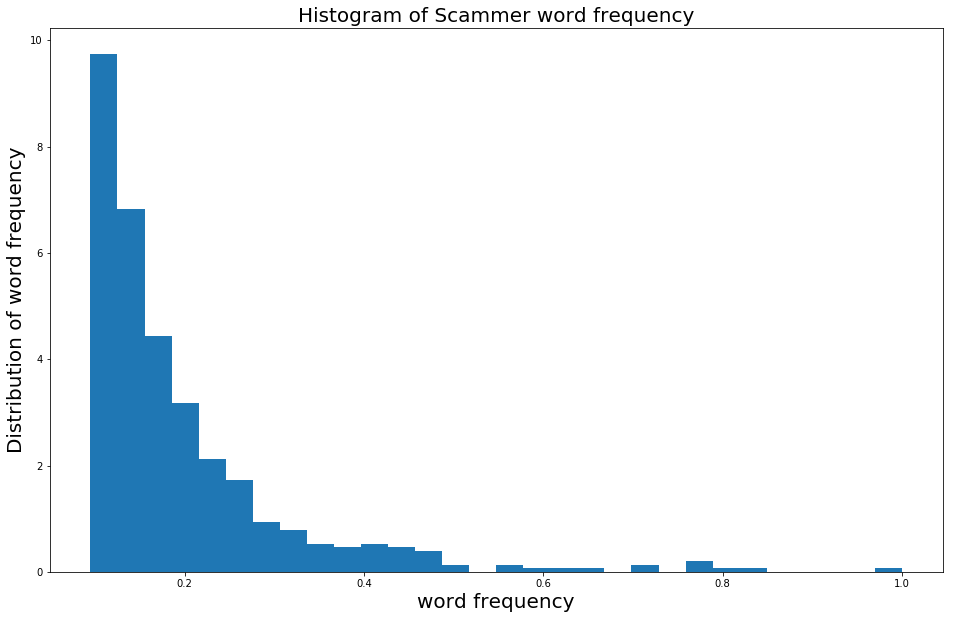

In [57]:
freq_word_legit = pd.DataFrame(pd.DataFrame(wc.words_, index=range(0,len(wc.words_))).iloc[0])
freq_word_legit = freq_word_legit.reset_index()
freq_word_legit.columns = ['word','frequency']

x = freq_word_legit['frequency']
fig, ax = plt.subplots(figsize = (16,10))
plt.hist(x, normed=True, bins=30)
ax.set_title('Histogram of Scammer word frequency', size=20)
ax.set_ylabel('Distribution of word frequency', size=20)
ax.set_xlabel('word frequency', size = 20)

freq_word_legit = freq_word_legit[freq_word_legit['frequency']>0.3]

In [59]:
freq_word_scam[~freq_word_scam['word'].isin(freq_word_legit['word'])]

,word,frequency
48,bad,0.5
49,badewanne,0.6
56,bars,0.5
76,bett,0.7
124,einfach,0.4
127,einkaufsmoeglichkeiten,0.4
142,fahren,0.4
143,fahrrad,0.5
167,fuss,0.8
302,moebliert,0.4


In [58]:
freq_word_legit[~freq_word_legit['word'].isin(freq_word_scam['word'])]

,word,frequency
3,alexanderplatz,0.330275
12,apartment,0.568807
29,bahn station,0.327217
30,bahnhof,0.363914
34,balkon,0.764526
40,befindet,0.773700
55,bist,0.354740
56,bitte,0.498471
60,braucht,0.327217
62,bus,0.406728


In [60]:
from textblob_de import TextBlobDE as TextBlobDE
from textblob import TextBlob

def calculate_sentiment(row):
    tb_obj = TextBlob(row['full_text'])
    row['polarity'] = tb_obj.polarity
    row['subjectivity'] = tb_obj.subjectivity 
    return row

def calculate_sentiment_de(row):
    tb_obj = TextBlobDE(row['full_text'])
    row['polarity_de'] = tb_obj.polarity
    row['subjectivity_de'] = tb_obj.subjectivity 
    return row

all_offers['polarity'] = 0
all_offers['subjectivity'] = 0
all_offers['polarity_de'] = 0
all_offers['subjectivy_de'] = 0

all_offers = all_offers.apply(calculate_sentiment, axis=1)
all_offers = all_offers.apply(calculate_sentiment_de, axis=1)

In [62]:
all_offers.groupby('scam').mean()[['miete','polarity','subjectivity', 'polarity_de', 'subjectivy_de']]

,miete,polarity,subjectivity,polarity_de,subjectivy_de
scam,,,,,
0.0,440.579088,0.068891,0.428253,0.282828,0.0
1.0,380.454545,0.158384,0.425637,0.324692,0.0


In [167]:
dir(TextBlob(all_offers['full_text'].iloc[0]))

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cmpkey',
 '_compare',
 '_create_sentence_objects',
 '_strkey',
 'analyzer',
 'classifier',
 'classify',
 'correct',
 'detect_language',
 'ends_with',
 'endswith',
 'find',
 'format',
 'index',
 'join',
 'json',
 'lower',
 'ngrams',
 'noun_phrases',
 'np_counts',
 'np_extractor',
 'parse',
 'parser',
 'polarity',
 'pos_tagger',
 'pos_tags',
 'raw',
 'raw_sentences',
 'replace',
 'rfind',
 'rindex',
 'sentences',
 'sentiment',
 'sentiment_assessments',
 'serialized',
 'split',
 'starts_with',
 'startswith',
 'string',
 'strip',
 'stripped',
 'subjectivi